### Analyzing data processed in FACET

* Dataset: `ant_tabletop` (Spring 2018, Week 2)
* Date of explorations in notebook: April 20, 2018 by Kit + some organization by Emily 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import datasets, cluster
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None
import pprint as pp
import helpers # written by us for MMLA pipeline purposes
# automatically refresh if anything has changed in a backend file
%load_ext autoreload
%autoreload 2

/Users/eqw5176/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## https://www.dataquest.io/blog/machine-learning-python/

### Emily and Kit pair programming

Trying a quick "plot the difference" visualization... Not super helpful right now though.

In [2]:
facet_emily_df = pd.read_csv('ant_tabletop_data/mid/Respondents Facce emily_mid.txt', sep='\t')
facet_connor_df = pd.read_csv('ant_tabletop_data/mid/Respondents Facce connor_mid.txt', sep='\t')

In [3]:
# added readable_timestamp helper function on April 23, 2018 at Kit's request
facet_emily_df = helpers.readable_timestamp(facet_emily_df)
facet_connor_df = helpers.readable_timestamp(facet_connor_df)
display(facet_emily_df.head())
display(facet_connor_df.head())

,Timestamp,Joy (Emotient FACET),Anger (Emotient FACET),Surprise (Emotient FACET),Fear (Emotient FACET),Contempt (Emotient FACET),Disgust (Emotient FACET),Sadness (Emotient FACET),Confusion (Emotient FACET),Frustration (Emotient FACET),Neutral (Emotient FACET),Positive (Emotient FACET),Negative (Emotient FACET),AU1 (Emotient FACET),AU2 (Emotient FACET),AU4 (Emotient FACET),AU5 (Emotient FACET),AU6 (Emotient FACET),AU7 (Emotient FACET),AU9 (Emotient FACET),AU10 (Emotient FACET),AU12 (Emotient FACET),AU14 (Emotient FACET),AU15 (Emotient FACET),AU17 (Emotient FACET),AU18 (Emotient FACET),AU20 (Emotient FACET),AU23 (Emotient FACET),AU24 (Emotient FACET),AU25 (Emotient FACET),AU26 (Emotient FACET),AU28 (Emotient FACET),AU43 (Emotient FACET),Readable Timestamp
0,400,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
1,600,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
2,800,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
3,1000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:01
4,1200,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:01


,Timestamp,Joy (Emotient FACET),Anger (Emotient FACET),Surprise (Emotient FACET),Fear (Emotient FACET),Contempt (Emotient FACET),Disgust (Emotient FACET),Sadness (Emotient FACET),Confusion (Emotient FACET),Frustration (Emotient FACET),Neutral (Emotient FACET),Positive (Emotient FACET),Negative (Emotient FACET),AU1 (Emotient FACET),AU2 (Emotient FACET),AU4 (Emotient FACET),AU5 (Emotient FACET),AU6 (Emotient FACET),AU7 (Emotient FACET),AU9 (Emotient FACET),AU10 (Emotient FACET),AU12 (Emotient FACET),AU14 (Emotient FACET),AU15 (Emotient FACET),AU17 (Emotient FACET),AU18 (Emotient FACET),AU20 (Emotient FACET),AU23 (Emotient FACET),AU24 (Emotient FACET),AU25 (Emotient FACET),AU26 (Emotient FACET),AU28 (Emotient FACET),AU43 (Emotient FACET),Readable Timestamp
0,400,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
1,600,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
2,800,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:00
3,1000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:01
4,1200,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,00:01


In [4]:
facet_e_minus_c_df = facet_emily_df.loc[:,:].copy()

# hacky: Remove the 0th column name ('Timestamp') and last column name ('Readable Timestamp') 
# because we do not want them in the subtraction/comparison dataframe
facet_cols = facet_emily_df.columns.values[1:-1]
facet_e_minus_c_df = facet_emily_df.loc[:,facet_cols] - facet_connor_df.loc[:,facet_cols]

# put the Timestamps back in
facet_e_minus_c_df['Timestamp'] = facet_emily_df.loc[:, 'Timestamp']
facet_e_minus_c_df['Readable Timestamp'] = facet_emily_df.loc[:, 'Readable Timestamp']

# check
display(facet_e_minus_c_df.head())

,Joy (Emotient FACET),Anger (Emotient FACET),Surprise (Emotient FACET),Fear (Emotient FACET),Contempt (Emotient FACET),Disgust (Emotient FACET),Sadness (Emotient FACET),Confusion (Emotient FACET),Frustration (Emotient FACET),Neutral (Emotient FACET),Positive (Emotient FACET),Negative (Emotient FACET),AU1 (Emotient FACET),AU2 (Emotient FACET),AU4 (Emotient FACET),AU5 (Emotient FACET),AU6 (Emotient FACET),AU7 (Emotient FACET),AU9 (Emotient FACET),AU10 (Emotient FACET),AU12 (Emotient FACET),AU14 (Emotient FACET),AU15 (Emotient FACET),AU17 (Emotient FACET),AU18 (Emotient FACET),AU20 (Emotient FACET),AU23 (Emotient FACET),AU24 (Emotient FACET),AU25 (Emotient FACET),AU26 (Emotient FACET),AU28 (Emotient FACET),AU43 (Emotient FACET),Timestamp,Readable Timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600,00:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,00:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,00:01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200,00:01


Text(0.5,0.98,'FACET Comparison (Emily - Connor)')

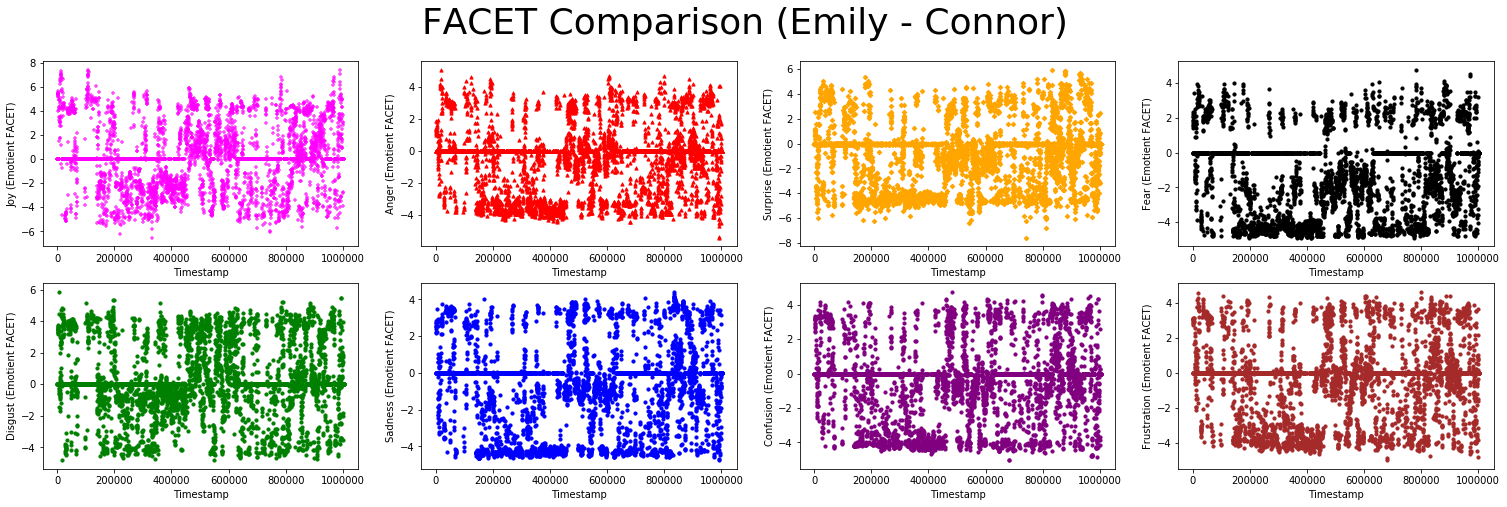

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, sharey=False)

facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Joy (Emotient FACET)', ax=ax1, figsize=(26, 7.5), s=10, color="magenta", marker="+", alpha=.7)
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Anger (Emotient FACET)', ax=ax2, s=10, color="red",marker="^")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Surprise (Emotient FACET)', ax=ax3, s=10,  color="orange", marker="D")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Fear (Emotient FACET)', ax=ax4, s=10,  color="black")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Disgust (Emotient FACET)', ax=ax5, s=10, color="green")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Sadness (Emotient FACET)', ax=ax6, s=10, color="blue")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Confusion (Emotient FACET)', ax=ax7, s=10, color="purple")
facet_e_minus_c_df.plot(kind='scatter', x='Timestamp', y='Frustration (Emotient FACET)', ax=ax8, s=10, color="brown")

fig.suptitle('FACET Comparison (Emily - Connor)', size='36')

### Explorations started earlier by Kit (@anthopper) 

In [6]:
data = pd.read_csv('ant_tabletop_data/mid/Respondents Facce connor_mid.txt', sep='\t')

In [7]:
# print the shape of the DataFrame
data.shape

(5019, 33)

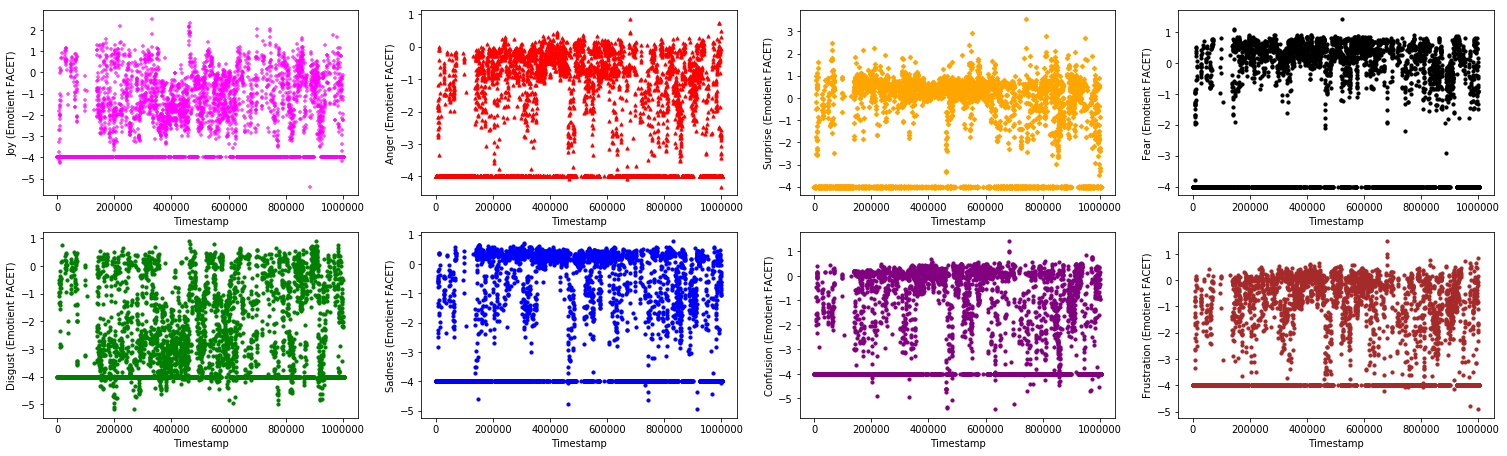

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, sharey=False)

data.plot(kind='scatter', x='Timestamp', y='Joy (Emotient FACET)', ax=ax1, figsize=(26, 7.5), s=10, color="magenta", marker="+", alpha=.7)
data.plot(kind='scatter', x='Timestamp', y='Anger (Emotient FACET)', ax=ax2, s=10, color="red",marker="^")
data.plot(kind='scatter', x='Timestamp', y='Surprise (Emotient FACET)', ax=ax3, s=10,  color="orange", marker="D")
data.plot(kind='scatter', x='Timestamp', y='Fear (Emotient FACET)', ax=ax4, s=10,  color="black")
data.plot(kind='scatter', x='Timestamp', y='Disgust (Emotient FACET)', ax=ax5, s=10, color="green")
data.plot(kind='scatter', x='Timestamp', y='Sadness (Emotient FACET)', ax=ax6, s=10, color="blue")
data.plot(kind='scatter', x='Timestamp', y='Confusion (Emotient FACET)', ax=ax7, s=10, color="purple")
data.plot(kind='scatter', x='Timestamp', y='Frustration (Emotient FACET)', ax=ax8, s=10, color="brown")

### Kit running sample code for sklearn functionality??

(Apologies for clearing the output in these cells. --Emily)

In [ ]:
fig, axs = plt.subplots(1, 4, sharey=False)
data.plot(kind='scatter', x='How much food stored', y='ReleaseReproductives', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Cordinates Y', y='Cordinates X', ax=axs[1])
data.plot(kind='scatter', x='How much food stored', y='Cordinates X', ax=axs[2])
data.plot(kind='scatter', x='How much food stored', y='Cordinates Y', ax=axs[3])

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [ ]:
CordinatesX + CordinatesY + ColorOfNest + Howmuchfoodstored

In [ ]:
lm = smf.ols(formula='ReleaseReproductives ~ Time + CordinatesX + CordinatesY + ColorOfNest + Howmuchfoodstored', data=data).fit() 
         

In [ ]:
lm.params

In [ ]:
lm.summary()

In [ ]:
%matplotlib inline
x = data.column="ReleaseReproductives"
data.hist(x, normed=False, bins=50)
plt.ylabel('Probability');
plt.xlabel('Day to Release Reproductives');

In [ ]:
##### %matplotlib inline
x = data.column="CordinatesY"
data.hist(x, normed=True, bins= 5)
plt.ylabel('Probability');
plt.xlabel('LocationY');

In [ ]:
%matplotlib inline
x = data.column="CordinatesX"
data.hist(x, normed=True, bins=5)
plt.ylabel('Probability');
plt.xlabel('Location X');

In [ ]:
# do the clustering
k_means = cluster.KMeans(n_clusters=7)
k_means.fit(data) 
labels = k_means.labels_

In [ ]:
##checking input type compatible (not nan and such)
np.any(np.isnan(data))

In [ ]:
np.all(np.isfinite(data))

In [ ]:
# plot the clusters in color
%matplotlib inline

fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(data["Time"],data["ReleaseReproductives"], data["ColorOfNest"], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Time')
ax.set_ylabel('Day of Reproductive Release')
ax.set_zlabel('Team Color')

plt.show()

In [ ]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=15, random_state=1)
# Get only the numeric columns from games.
good_columns = data._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

In [ ]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [ ]:
data.corr()["ReleaseReproductives"]